In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# E0 = 0.9 # eficiencia inicial (random walk)
mc_mps = 12 # saturacao em 100 nm em monte carlo (MC)
layers_count = 6 # camadas do filtro, 100 nm cada camada --> dividir pela altura do filtro
D = 0.5 # desgaste --> talvez de pra extrair do artigo da nature

In [3]:
N = (mc_mps*5e6)/100 # capacidade uma camada do sistema (MC): (#mps * 5e6 nm)/100nm
Nmax = layers_count * N # capacidade max do sistema

In [4]:
import sys
sys.path.append("../4_thermo-model/")

from utils.layers import filter_creation
from utils.mps import mps_creation
from utils.simulation import filtration_sim

In [13]:
def filtered_MPs(t):
    
    # avaliar qtd mps filtrados ao longo do tempo

    tamanho_rede = 500
    mps = 500

    filtro = filter_creation(tamanho_rede = tamanho_rede,
                    porosidade = 0.2,
                    camadas = 6,
                    diametro_fibra = 4,
                    concentracao_cbm = 0.1,
                    tamanho_cbm = 1,
                    CBM=True,
                    display=False)

    Nt = []

    for t_i in range(t):
        mps_dic = mps_creation(qnt_mps = mps,
                            tamanho_limite_mp = 100,tamanho_rede=tamanho_rede)

        mps_retidos,retencao_camada = filtration_sim(filtro,mps_dic,tamanho_rede=tamanho_rede,display=False,prob=False)
        Nt.append(mps_retidos)

        if t_i == 0:
            E0 = mps_retidos/mps

    return Nt,E0

In [14]:
def efficiency(t): # determinando a eficiencia no tempo
    
    Nt,E0 = filtered_MPs(t)
    Eff = []
    for N_i,t_i in zip(Nt,range(t)):
        E = E0 * (1-N_i/Nmax) - np.exp(-D*t_i)
        Eff.append(E)

    time = range(t)
    
    plt.plot(time,Nt)
    plt.xlabel('Time'),plt.ylabel('# Retained MPs')
    plt.show()
    plt.plot(time,Eff)
    plt.xlabel('Time'),plt.ylabel('Efficiency')
    plt.show()

Filtro criado, 5.34
MPs criados, 3.03
Simulação finalizada, 2.26
MPs criados, 3.32
Simulação finalizada, 2.21
MPs criados, 5.97
Simulação finalizada, 2.44
MPs criados, 3.55
Simulação finalizada, 2.15
MPs criados, 4.08
Simulação finalizada, 2.33


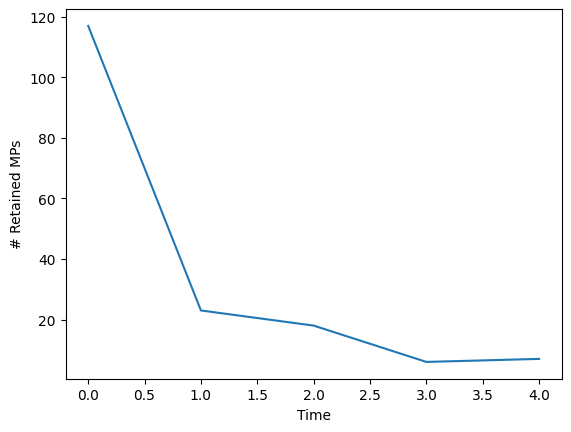

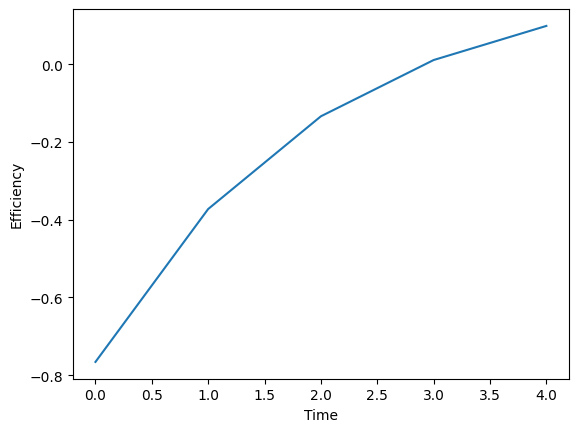

In [15]:
efficiency(5)